<a href="https://colab.research.google.com/github/Mariano1985-design/Data-Science-I---84650/blob/main/PrecioPropiedades_Foletto_84650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
El dataset contiene precios de venta de casas para el condado de King, que incluye Seattle. Incluye casas vendidas entre mayo de 2014 y mayo de 2015.</font>

El análisis tiene como objetivo entender la relación del precio y las variables descriptas en el dataset y poder tener un valor de referencia que permita poder estimar precios por tipo de propiedad.</font>

Elegi este dataset para luego poder aplicar esto en casos prácticos en mi trabajo, por ejemplo entender como relacionar multivariables y poder identificar como cada una impacta en el resultado.</font>

#  Preguntas e Hipótesis
Con las variables disponibles se encontrara un patrón para poder predecir el precio de una casa.

La principal variable que influye en el precio de la propiedad son los pies cuadrados.

Entender si la antigüedad de la casa influye en un menor precio de la propiedad y cuánto es la relación.

Hipótesis Nula (H0): Las características disponibles (m2, habitaciones, baños, año de construcción, etc.) no son suficientes para predecir el precio de la casa con una precisión significativamente mejor que el azar.

Hipótesis Alternativa (H1): Es posible construir un modelo utilizando las características disponibles que prediga el precio de las casas significativamente superiores al 50% (azar).

# Análisis del dataset

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.3f}'.format
from matplotlib.ticker import FuncFormatter # Importa FuncFormatter

In [143]:
# Importación de archivo csv que esta guardado en Github
url = 'https://raw.githubusercontent.com/Mariano1985-design/Data-Science-I---84650/main/kc_house_data.csv'
df_casas = pd.read_csv(url)
print(df_casas.head())

           id             date       price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221,900.000         3      1.000         1180   
1  6414100192  20141209T000000 538,000.000         3      2.250         2570   
2  5631500400  20150225T000000 180,000.000         2      1.000          770   
3  2487200875  20141209T000000 604,000.000         4      3.000         1960   
4  1954400510  20150218T000000 510,000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000           0     0  ...      7        1180              0   
1      7242   2.000           0     0  ...      7        2170            400   
2     10000   1.000           0     0  ...      6         770              0   
3      5000   1.000           0     0  ...      7        1050            910   
4      8080   1.000           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode    

Diccionario columnas


*   Id = id para cada registro
*   date = fecha
*   price = precio
*   bedrooms = habitaciones
*   bathrooms = baños
*   sqft_living = pies cuadrados de vivienda
*   sqfl_lot = pies cuadrados de terreno
*   floors = pisos
*   waterfront = frente al mar
*   view = vista
*   condition = condición
*   grade = calificación
*   sqft_above = pies cuadrados sobre el nivel del suelo
*   sqft_basement = pies cuadrados del sótano
*   yr_built = año construcción
*   yr_renovated = año de renovación
*   zipcode = código postal
*   lat = latitud
*   long = longitud
*   sqft_living15 = pies cuadrados de vivienda 15
*   sqft_lot15 = pies cuadrados de lote 15

In [144]:
# Información general del DataFrame (tipos de datos, nulos, etc.)
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [145]:
# Ver las columnas disponibles
print(f"\nColumnas: {df_casas.columns.tolist()}")


Columnas: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [146]:
# Cantidad de filas y columnas del dataframe
print(f"\nDimensiones del DataFrame: {df_casas.shape}")


Dimensiones del DataFrame: (21613, 21)


In [147]:
# Cambio a date como datatime
df_casas['date'] = pd.to_datetime(df_casas['date'])
df_casas.dtypes['date']

dtype('<M8[ns]')

In [148]:
#Descripción general del dataframe
df_casas.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.000",21613,"21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000",...,"21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000"
mean,"4,580,301,520.865",2014-10-29 04:38:01.959931648,"540,088.142",3.371,2.115,"2,079.900","15,106.968",1.494,0.008,0.234,...,7.657,"1,788.391",291.509,"1,971.005",84.402,"98,077.940",47.560,-122.214,"1,986.552","12,768.456"
min,"1,000,102.000",2014-05-02 00:00:00,"75,000.000",0.000,0.000,290.000,520.000,1.000,0.000,0.000,...,1.000,290.000,0.000,"1,900.000",0.000,"98,001.000",47.156,-122.519,399.000,651.000
25%,"2,123,049,194.000",2014-07-22 00:00:00,"321,950.000",3.000,1.750,"1,427.000","5,040.000",1.000,0.000,0.000,...,7.000,"1,190.000",0.000,"1,951.000",0.000,"98,033.000",47.471,-122.328,"1,490.000","5,100.000"
50%,"3,904,930,410.000",2014-10-16 00:00:00,"450,000.000",3.000,2.250,"1,910.000","7,618.000",1.500,0.000,0.000,...,7.000,"1,560.000",0.000,"1,975.000",0.000,"98,065.000",47.572,-122.230,"1,840.000","7,620.000"
75%,"7,308,900,445.000",2015-02-17 00:00:00,"645,000.000",4.000,2.500,"2,550.000","10,688.000",2.000,0.000,0.000,...,8.000,"2,210.000",560.000,"1,997.000",0.000,"98,118.000",47.678,-122.125,"2,360.000","10,083.000"
max,"9,900,000,190.000",2015-05-27 00:00:00,"7,700,000.000",33.000,8.000,"13,540.000","1,651,359.000",3.500,1.000,4.000,...,13.000,"9,410.000","4,820.000","2,015.000","2,015.000","98,199.000",47.778,-121.315,"6,210.000","871,200.000"
std,"2,876,565,571.312",NaN,"367,127.196",0.930,0.770,918.441,"41,420.512",0.540,0.087,0.766,...,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,"27,304.180"


In [149]:
# No se advierten valores nulos en las columnas
print("Conteo de valores nulos por columna:")
print(df_casas.isnull().sum())

Conteo de valores nulos por columna:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


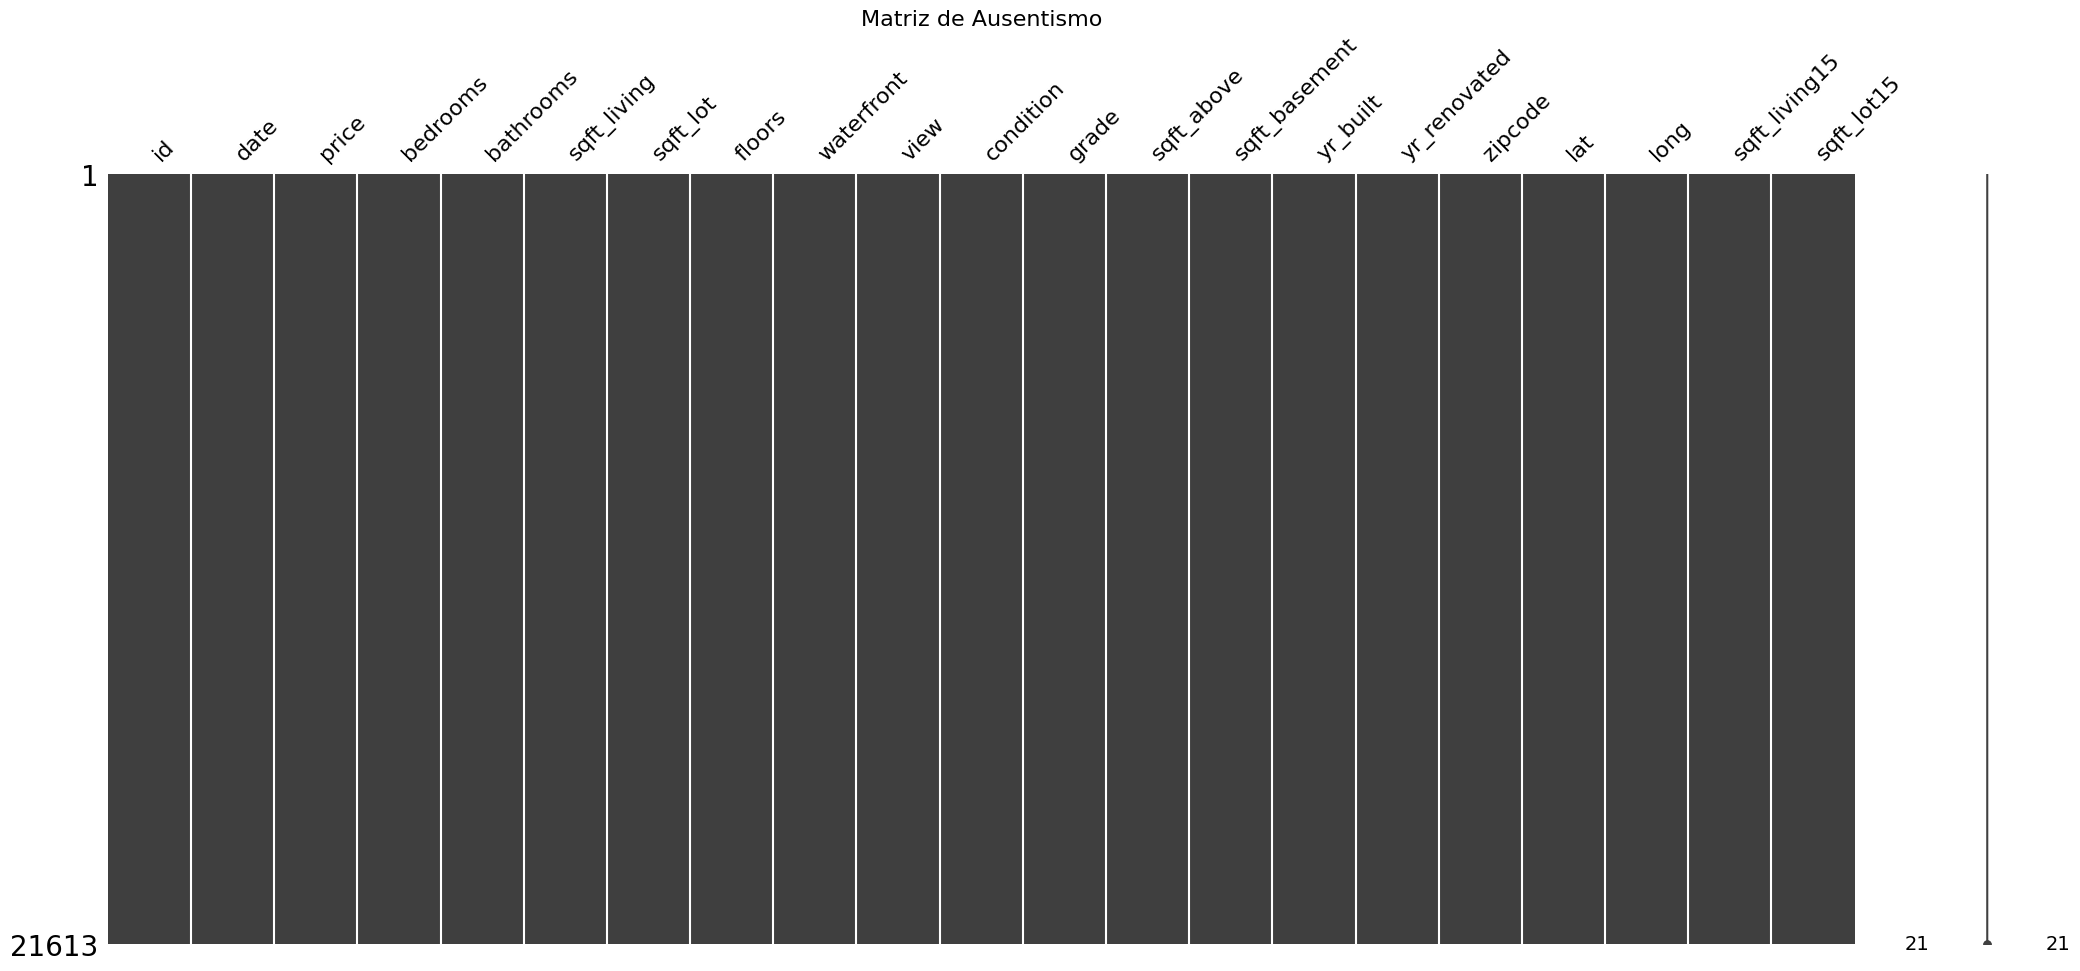

In [150]:
# No se advierten valores nulos en las columnas
msno.matrix(df_casas)
plt.title('Matriz de Ausentismo', fontsize=16)
plt.show()

# Estadisticas y Gráficos

In [151]:
# Calculo del promedio, mediana, moda y desviación estandar del precio de las propiedades
promedio_precio = df_casas['price'].mean()
mediana_precio = df_casas['price'].median()
moda_precio = df_casas['price'].mode()
desviacion_estandar_precio = df_casas['price'].std()
min_precio = df_casas['price'].min()
max_precio = df_casas['price'].max()
rango_precio = max_precio - min_precio
varianza_precio = df_casas['price'].var()


print(f"El promedio del precio es: {promedio_precio}")
print(f"La mediana del precio es: {mediana_precio}")
print(f"La moda del precio es:\n{moda_precio}")
print(f"La desviación estándar del precio es: {desviacion_estandar_precio}")
print(f"Precio Mínimo: {min_precio}")
print(f"Precio Máximo: {max_precio}")
print(f"Rango del Precio: {rango_precio}")
print(f"Varianza del Precio: {varianza_precio:.2f}")


El promedio del precio es: 540088.1417665294
La mediana del precio es: 450000.0
La moda del precio es:
0   350,000.000
1   450,000.000
Name: price, dtype: float64
La desviación estándar del precio es: 367127.1964826997
Precio Mínimo: 75000.0
Precio Máximo: 7700000.0
Rango del Precio: 7625000.0
Varianza del Precio: 134782378397.25


In [152]:
Q1_precio = df_casas['price'].quantile(0.25) # 0.25 para el 25% (Q1)
Q3_precio = df_casas['price'].quantile(0.75) # 0.75 para el 75% (Q3)
IQR_precio = Q3_precio - Q1_precio
print(f"Primer Cuartil (Q1) de Precios: {Q1_precio}")
print(f"Tercer Cuartil (Q3) de Precios: {Q3_precio}")
print(f"Rango Intercuartílico (IQR) de Precios: {IQR_precio:.2f}")

Primer Cuartil (Q1) de Precios: 321950.0
Tercer Cuartil (Q3) de Precios: 645000.0
Rango Intercuartílico (IQR) de Precios: 323050.00


In [153]:
pd.options.display.float_format = '{:.2f}'.format
print(df_casas['price'].describe())

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64


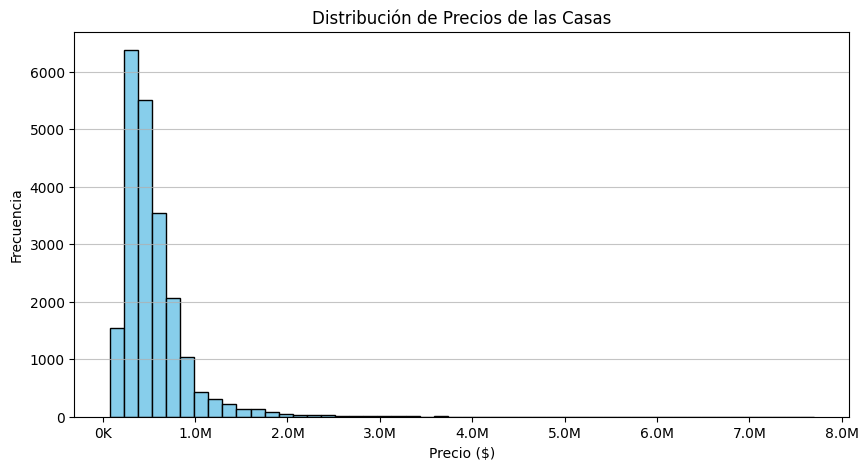

In [166]:
plt.figure(figsize=(10, 5))
plt.hist(df_casas['price'], bins=50, edgecolor='black', color='skyblue')
plt.title('Distribución de Precios de las Casas')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# 1. Define la función de formato
def format_millions(x, pos):
    'The two args are the value and tick position'
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    else:
        return f'{x*1e-3:.0f}K'

# 2. Aplica el formato al eje X
formatter = FuncFormatter(format_millions)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

# Con este gráfico puede obervarse que los precios de las casa se encuentran mayormente entre 0 y 1 millones.

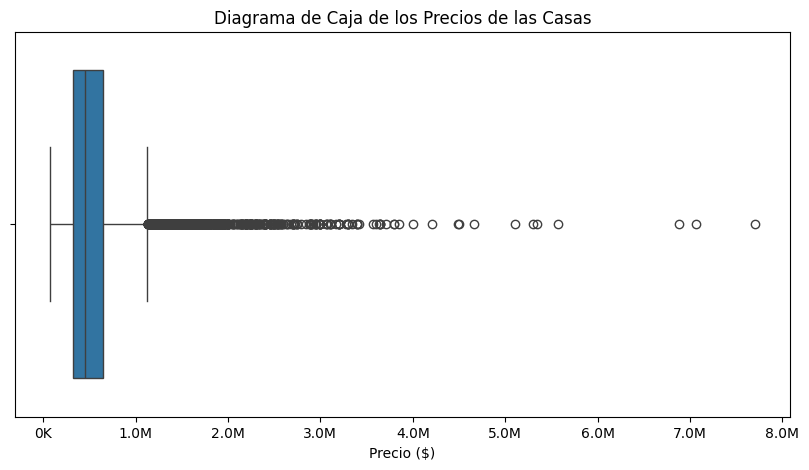

In [167]:
# Crea la función de formato para los miles
def format_millions(x, pos):
    'The two args are the value and tick position'
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    else:
        return f'{x*1e-3:.0f}K'

# Gráfico
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_casas['price'])
plt.title('Diagrama de Caja de los Precios de las Casas')
plt.xlabel('Precio ($)')
formatter = FuncFormatter(format_millions)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

# Con este gráfico puede obervarse que los precios de las casa se encuentran mayormente entre 0 y 1 millones, igual a lo visto en el gráfico anterior.

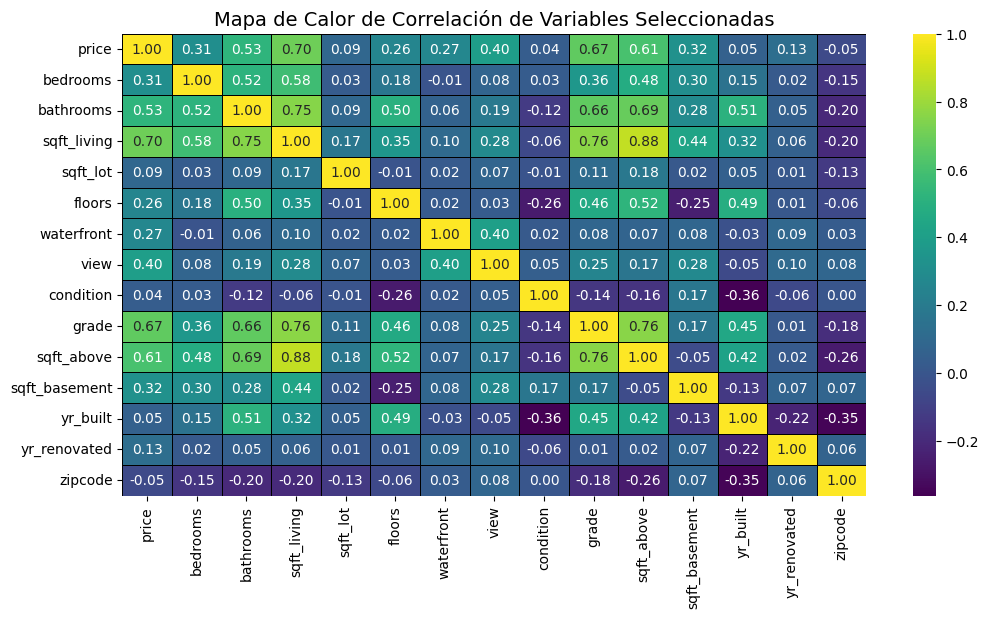

In [156]:
# Mapa de calor para identificar como se relacionan las variables seleccionadas
columnas_para_grafico = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'zipcode',]
matriz_correlacion = df_casas[columnas_para_grafico].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(matriz_correlacion,
            annot=True,
            fmt=".2f",
            cmap="viridis",
            linewidths=.5,
            linecolor="black")
plt.title('Mapa de Calor de Correlación de Variables Seleccionadas', fontsize=14)
plt.show()

# Con este cuadro se observa como influye cada variable en la otra.
# Por ejemplo lo principal que influye en el precio son los pies cuadrados de la vivienda, la calificación y pies cuadrados sobre el nivel del suelo.

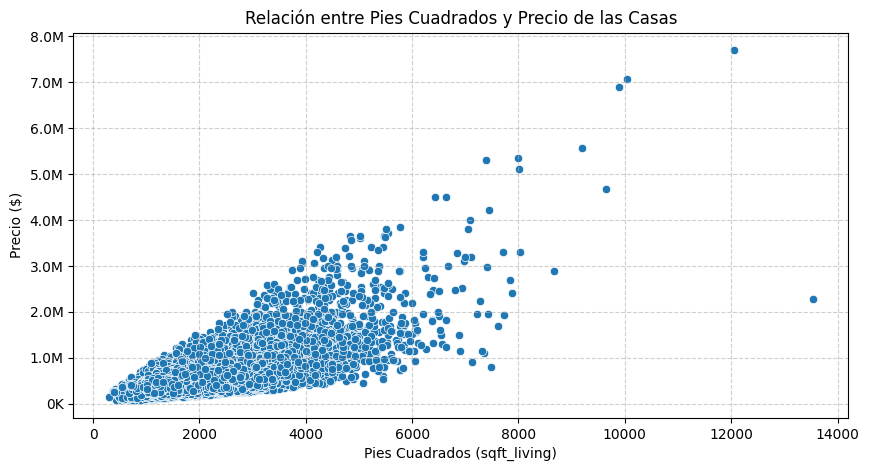

In [176]:
def format_millions(x, pos):
    'The two args are the value and tick position'
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    else:
        return f'{x*1e-3:.0f}K'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sqft_living', y='price', data=df_casas)
plt.title('Relación entre Pies Cuadrados y Precio de las Casas')
plt.xlabel('Pies Cuadrados (sqft_living)')
plt.ylabel('Precio ($)')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
formatter = FuncFormatter(format_millions)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Existente una relación evidente entre los pies2 y el precio de las casas.

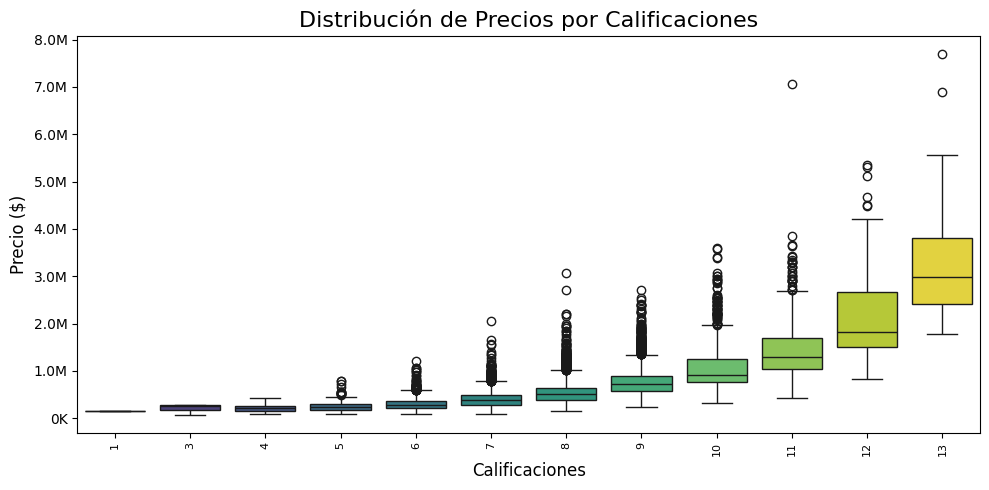

In [170]:
# 2. Precio de las casas por calificaciones
def format_millions(x, pos):
    'The two args are the value and tick position'
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    else:
        return f'{x*1e-3:.0f}K'
plt.figure(figsize=(10, 5))
sns.boxplot(x='grade', y='price', data=df_casas, hue='grade', palette="viridis", legend=False)
plt.xticks(rotation=90, fontsize=8)
plt.title('Distribución de Precios por Calificaciones', fontsize=16)
plt.xlabel('Calificaciones', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)
formatter = FuncFormatter(format_millions)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# Existente una relación evidente entre las Calificaciones y el precio de las casas.

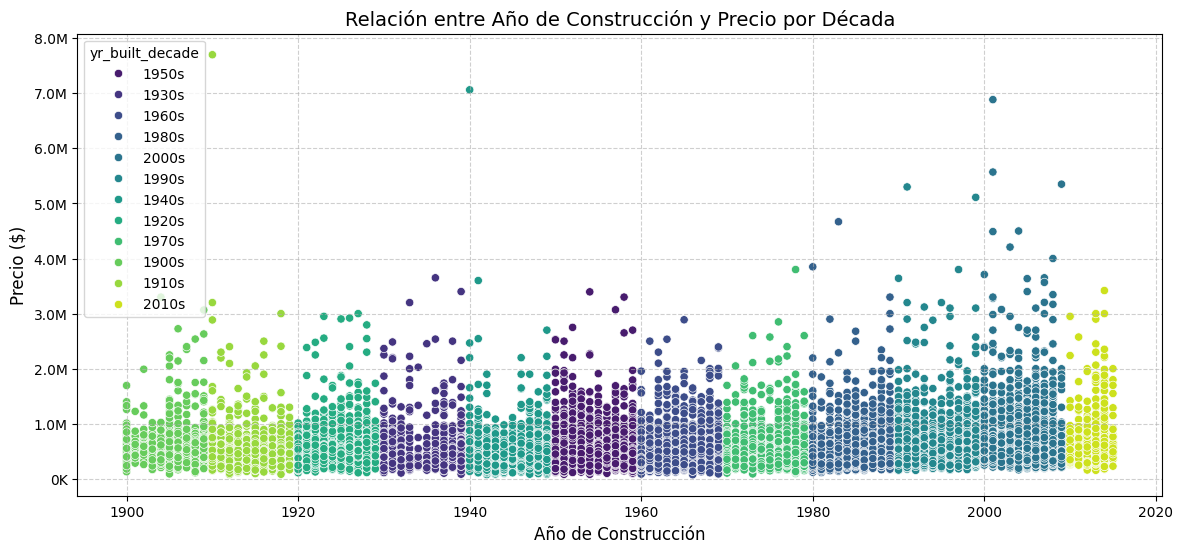

In [171]:
# Agrupa los años de construcción en categorías de 10 años
df_casas['yr_built_decade'] = (df_casas['yr_built'] // 10) * 10
df_casas['yr_built_decade'] = df_casas['yr_built_decade'].astype(str) + 's'

def format_millions(x, pos):
    'The two args are the value and tick position'
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    else:
        return f'{x*1e-3:.0f}K'

# Gráfico
plt.figure(figsize=(14, 6))
sns.scatterplot(x='yr_built', y='price', hue='yr_built_decade', data=df_casas, palette="viridis")
plt.title('Relación entre Año de Construcción y Precio por Década', fontsize=14)
plt.xlabel('Año de Construcción', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)
formatter = FuncFormatter(format_millions)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# No se advierte en el siguiente gráfico que influya el año de construcción en el precio de la misma.

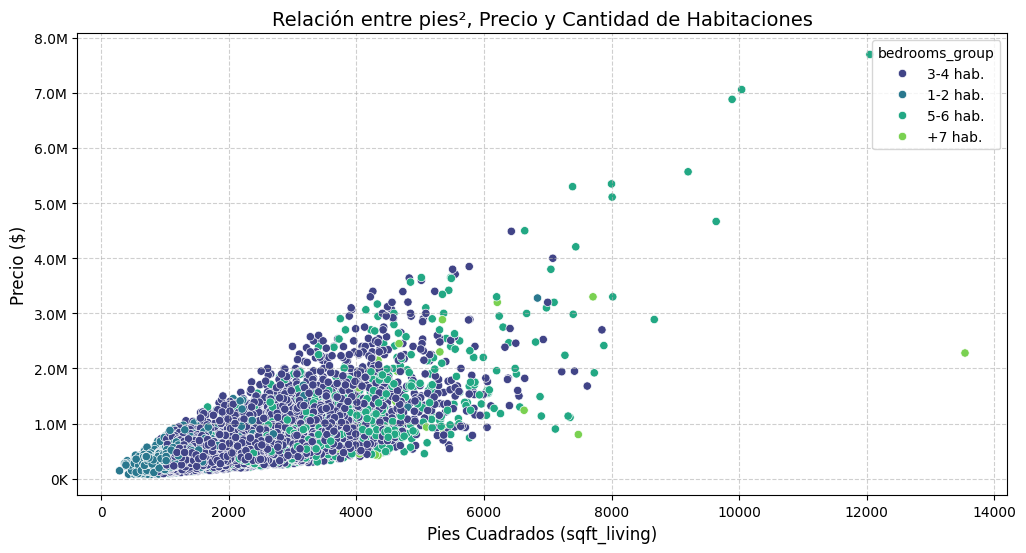

In [172]:
# Define la función de agrupación de habitaciones
def agrupar_habitaciones(num):
    if num <= 2:
        return '1-2 hab.'
    elif num <= 4:
        return '3-4 hab.'
    elif num <= 6:
        return '5-6 hab.'
    else:
        return '+7 hab.'
df_casas['bedrooms_group'] = df_casas['bedrooms'].apply(agrupar_habitaciones)

def format_millions(x, pos):
    'The two args are the value and tick position'
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    else:
        return f'{x*1e-3:.0f}K'

# Gráfico
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sqft_living', y='price', hue='bedrooms_group', data=df_casas, palette='viridis')
plt.title('Relación entre pies², Precio y Cantidad de Habitaciones', fontsize=14)
plt.xlabel('Pies Cuadrados (sqft_living)', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)
formatter = FuncFormatter(format_millions)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# No se advierte claramente que la cantidad de habitaciones influya en el precio tanto como lo hacen los pies cuadrados.

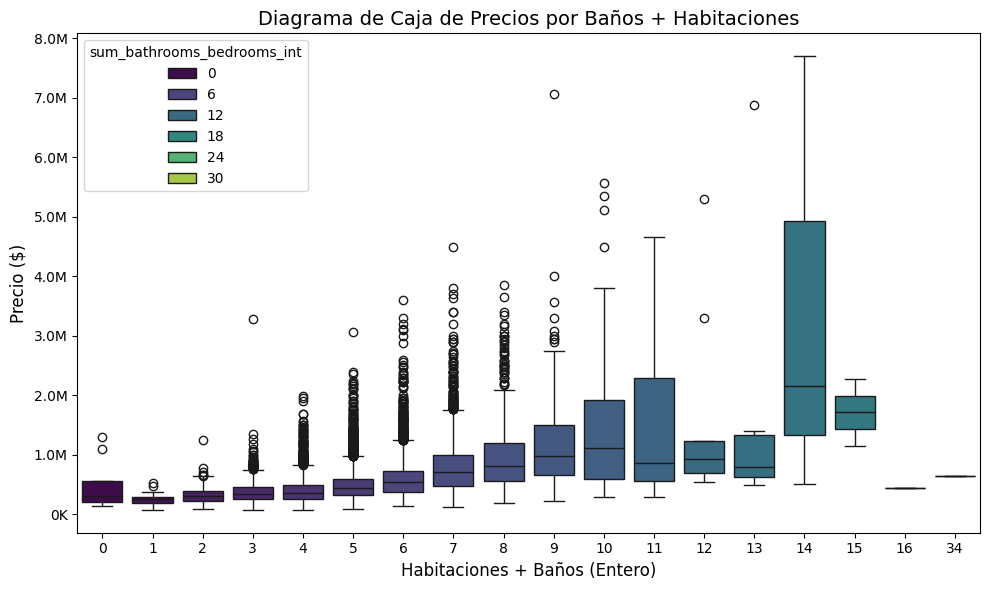

In [173]:
# Nueva columna que suma los baños y las habitaciones
df_casas['sum_bathrooms_bedrooms'] = df_casas['bathrooms'] + df_casas['bedrooms']
# Convierte la columna a tipo entero
df_casas['sum_bathrooms_bedrooms_int'] = df_casas['sum_bathrooms_bedrooms'].astype(int)

def format_millions(x, pos):
    'The two args are the value and tick position'
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    else:
        return f'{x*1e-3:.0f}K'

# Gráfico
plt.figure(figsize=(10,6))
sns.boxplot(x='sum_bathrooms_bedrooms_int', y='price', data=df_casas, hue='sum_bathrooms_bedrooms_int', palette="viridis")
plt.title('Diagrama de Caja de Precios por Baños + Habitaciones', fontsize=14)
plt.xlabel('Habitaciones + Baños (Entero)', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)
formatter = FuncFormatter(format_millions)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# Con este gráfico se ve que el precio varia relativamente poco al tener más espacios en la casa.
# Pero si hay más dispersión en los precio de las casas al aumentar la cantidad de espacios.

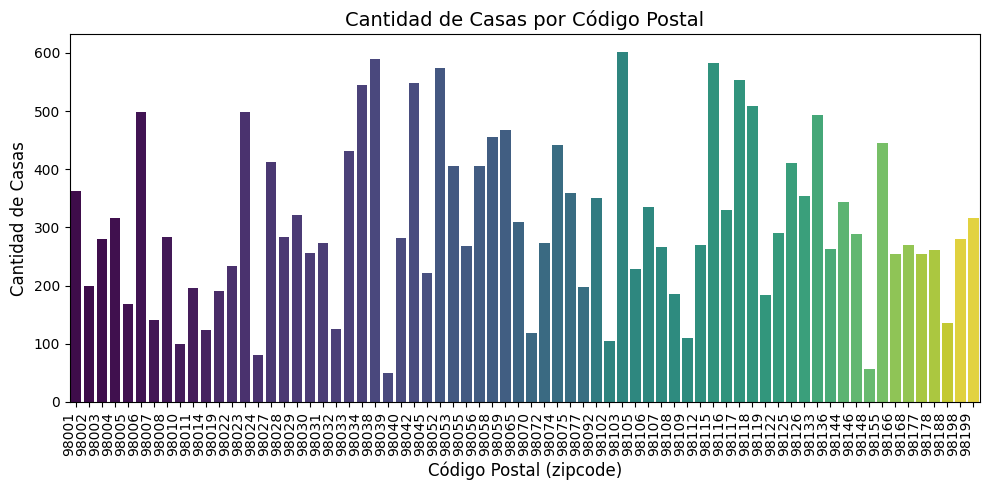

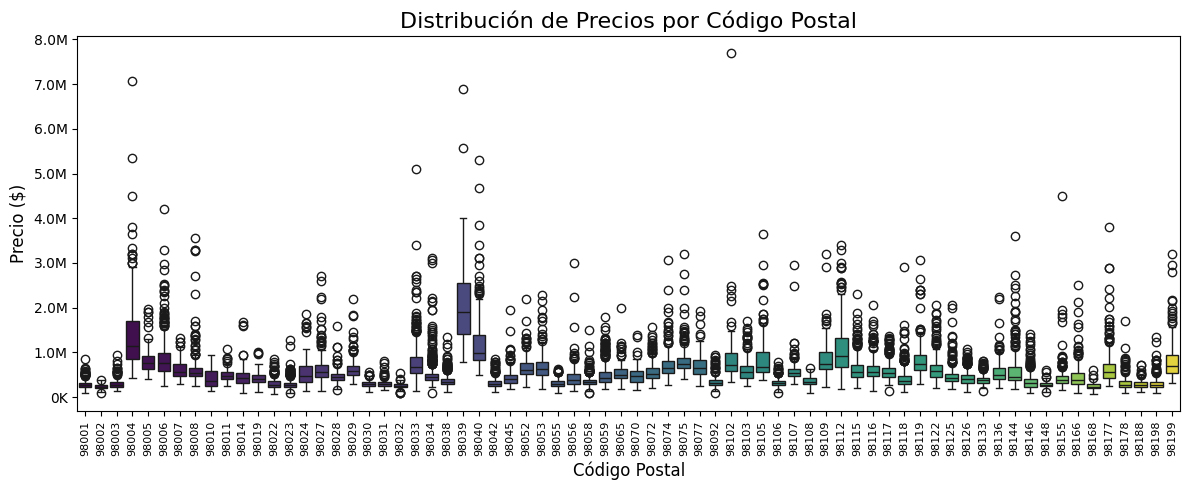

In [175]:
# 1. Casas por codigo postal
conteo_zipcode = df_casas['zipcode'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_zipcode.index, y=conteo_zipcode.values, hue=conteo_zipcode.index, palette="viridis", legend=False)
plt.title('Cantidad de Casas por Código Postal', fontsize=14)
plt.xlabel('Código Postal (zipcode)', fontsize=12)
plt.ylabel('Cantidad de Casas', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# 2. Precio de las casas por codigo postal
def format_millions(x, pos):
    'The two args are the value and tick position'
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    else:
        return f'{x*1e-3:.0f}K'
plt.figure(figsize=(12, 5))
sns.boxplot(x='zipcode', y='price', data=df_casas, hue='zipcode', palette="viridis", legend=False)
plt.xticks(rotation=90, fontsize=8)
plt.title('Distribución de Precios por Código Postal', fontsize=16)
plt.xlabel('Código Postal', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)
formatter = FuncFormatter(format_millions)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

# Hay una distribución casi equitativa, al ver e gráfico, de las casas por codigo postal.
# En el segundo gráfico se ve que hay 2 o 3 codigos postales en donde los precios de las casas son más altos, habrá que analizar si son casas más grandes.

In [163]:
import folium
from folium.plugins import HeatMap

# 1. Crea un mapa base centrado en una ubicación relevante (por ejemplo, Seattle)
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# 2. Prepara los datos para el mapa de calor
heat_data = [[row['lat'], row['long']] for index, row in df_casas.iterrows()]

# 3. Agrega el mapa de calor al mapa base
HeatMap(heat_data).add_to(m)

# 4. Muestra el mapa en la salida de Colab
m

# Conclusiones Preliminares

En cada uno de los gráficos hay un comentario respecto al análisis realizado.

Resumen conclusiones preliminares:

1.   Precio de las casas

      *   Promedio = 540.088 USD
      *   Mediana = 450.000 USD
      *   Mínimo = 75.000 USD
      *   Máximo = 7.700.000 USD

      *   Percentil 25% = 321.950 USD
      *   Percentil 50% = 450.000 USD
      *   Percentil 75% = 645.000 USD

      *   Desviación estándar = 367.127

2.   Principales variables que influyen en el precio

      *   Pies cuadrados de la vivienda

      *   Calificaciones de la vivienda

      *   Pies cuadrados sobre el nivel del suelo
      